Reference website for overview of GCN: [LINK](http://tkipf.github.io/graph-convolutional-networks/)

In [8]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

# Part 1: NumPy Example of GCN on Sample Dataset

Graph Info:
 Graph named 'G' with 6 nodes and 7 edges

Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/3724959495.py:22: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('Graph Info:\n', nx.info(G))


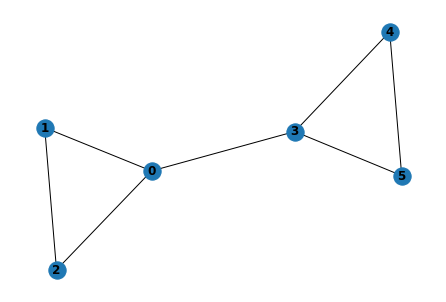

In [8]:
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#Initialize the graph
G = nx.Graph(name='G')

#Create nodes
#In this example, the graph will consist of 6 nodes.
#Each node is assigned node feature which corresponds to the node name
for i in range(6):
    G.add_node(i, name=i)


#Define the edges and the edges to the graph
edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)]
G.add_edges_from(edges)

#See graph info
print('Graph Info:\n', nx.info(G))

#Inspect the node features
print('\nGraph Nodes: ', G.nodes.data())

#Plot the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [9]:
# Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (6, 6)

Shape of X:  (6, 1)

Adjacency Matrix (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features Matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/784659161.py:2: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  A = np.array(nx.attr_matrix(G, node_attr='name')[0])
/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/784659161.py:3: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  X = np.array(nx.attr_matrix(G, node_attr='name')[1])


In [10]:
# Dot product Adjacency Matrix (A) and Node Features (X)
AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


#### The dot product of Adjacency Matrix and Node Features Matrix represents the sum of neighboring node features.
#### But, if we think about it more, we will realize that while AX sums up the adjacent node features, it does not take into account the features of the node itself.
* So we have to insert some self loops

In [11]:
# Add Self Loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

# Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

# Get the Adjacency Matrix (A) and Node Features Matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)

# Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/3005080699.py:14: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])


In [12]:
# Normalize the data by finding the dot product with degree matrix
#Get the Degree Matrix of the added self-loops graph
Deg_Mat = G_self_loops.degree()
print('Degree Matrix of added self-loops G (D): ', Deg_Mat)

#Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Degree Matrix of added self-loops G as numpy array (D):\n', D)

#Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Degree Matrix of added self-loops G (D):  [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix of added self-loops G as numpy array (D):
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
 [[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


### Normalization from the paper 

In [16]:
# Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


### Add Weights and Activation 

In [46]:
#Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    A_hat = A + I # add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)


#Do forward propagation
H1 = gcn(A,X,W0) # Layer one 
H2 = gcn(A,H1,W1) # Layer two
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


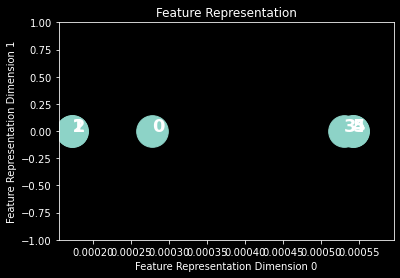

In [47]:

def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

# Part 2: Implement a 1 Layer GCN to Classify Node Label on CORA dataset

In [150]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from scipy.linalg import fractional_matrix_power

In [3]:
# specify data source  
core_fp_edges, core_fp_nodes = "../data/raw/cora/cora/cora.cites", "../data/raw/cora/cora/cora.content"

# use the edges to create a graph; store the content to each nodes 
edges_df = pd.read_csv(core_fp_edges, names=["target", "source"], header=None, delimiter='\t')
print(edges_df.shape)
edges_df.head()

(5429, 2)


,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


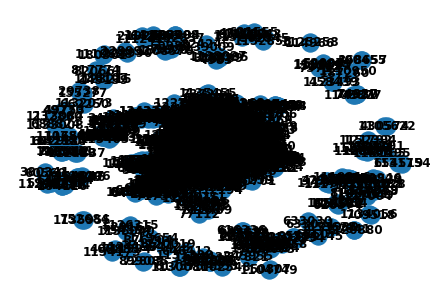

In [4]:
# create networkx graph object with edgelist 
cora_g = nx.from_pandas_edgelist(edges_df)
nx.draw(cora_g, with_labels=True, font_weight='bold')

In [5]:
# get the features of each paper 
columns = [f"word_{i}" for i in range(1433)] + ["subject"]
features_df = pd.read_csv(core_fp_nodes,names=columns, delimiter='\t')
features_df.head()

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [6]:
# assign features to each nodes
nx.set_node_attributes(cora_g, features_df['subject'].to_dict(), "subject")
nx.get_node_attributes(cora_g, "subject")[1033] # check node subject assignment

'Genetic_Algorithms'

PyTorch alternative data source: torch-geometric

- Install with: conda install pyg -c pyg
- Load data: 
    ```{python} 
    from torch_geometric.datasets import Planetoid 
    dataset = Planetoid(root='~/somewhere/Cora', name='Cora')
    ```
- Visualize with: 
    ```{python}
    import networkx as nx 
    from torch_geometric.utils import to_networkx 
    G = to_networkx(data, to_undirected=True) nx.draw(G)
    ```

### Implement a GCN layer in PyTorch

In [7]:
import torch
from torch import nn
device = torch.device("cuda:0" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
print(f"PyTorch is using {device}. ")


PyTorch is using mps. 


In [184]:
# create a nodelist to retrieve node number from index 
nodelist = list(cora_g.nodes) 
print("First 5 nodes in the list ", nodelist[:5], " out of ", len(nodelist), " number of nodes. ") # this is corresponding to the adjacency matrix 


First 5 nodes in the list  [1033, 35, 103482, 103515, 1050679]  out of  2708  number of nodes. 


In [172]:
# get the adjacency matrix from established graph 
A = nx.to_numpy_matrix(cora_g, dtype=np.float32)  # unweighted adj matrix 
A = torch.from_numpy(A) # change it to a tensor object 

# encode the labesl labels 
categories = dict(zip(['Case_Based', 
                        'Genetic_Algorithms',
                        'Neural_Networks',
                        'Probabilistic_Methods',
                        'Reinforcement_Learning',
                        'Rule_Learning',
                        'Theory'
                    ], list(range(7))))
labels = features_df.loc[nodelist]['subject'] # get the actual label 
labels = torch.tensor([categories[cat] for cat in labels]).unsqueeze(dim=1)

# ohe = OneHotEncoder()
# ohe.fit(labels.reset_index()) 
# print("Onehot encoded categories: \n", ohe.categories_[0], "\n", ohe.categories_[1])
# onehot_labels = ohe.transform(labels.reset_index()).todense()
# onehot_labels = [torch.from_numpy(lst) for lst in onehot_labels]

# creates the training and testing dataset 
# train_size = int(A.shape[0] * 0.5)
# validation_size = int(A.shape[0] * 0.8) - train_size
# train_nodes, train_labels = A[:train_size], onehot_labels[:train_size]
# validation_nodes, validation_labels = A[train_size:validation_size+train_size], onehot_labels[train_size:validation_size+train_size]
# test_nodes, test_labels = A[validation_size+train_size:], onehot_labels[validation_size+train_size:]

# creates the training and testing dataset (without ohe)
train_size = int(A.shape[0] * 0.5)
validation_size = int(A.shape[0] * 0.8) - train_size
train_nodes, train_labels = A[:train_size], labels[:train_size]
validation_nodes, validation_labels = A[train_size:validation_size+train_size], labels[train_size:validation_size+train_size]
test_nodes, test_labels = A[validation_size+train_size:], labels[validation_size+train_size:]



In [173]:
# check training and testing datasets
print(len(train_nodes) == len(train_labels), len(train_labels))
print(len(validation_nodes) == len(validation_labels), len(validation_nodes))
print(len(test_nodes) == len(test_labels), len(test_nodes))

True 1354
True 812
True 542


- Here are some legacy code for dataloading in pytorch, might be useful later on

In [18]:
# # save the data in a custom dataset 
# import networkx as nx
# import pandas as pd
# from torch.utils.data import Dataset

# class NodeVLabelDataset(Dataset):
#     def __init__(self, cora_cites_fp, cora_content_fp):
#         # setup the graph 
#         self.cora_cites_fp, self.cora_content_fp = cora_cites_fp, cora_content_fp
#         self.edges_df = pd.read_csv(self.cora_cites_fp, names=["target", "source"], header=None, delimiter='\t')
#         self.graph = nx.from_pandas_edgelist(self.edges_df)       

#         # create the adjacency matrix 
#         self.A = nx.to_numpy_matrix(self.graph, dtype=np.float32)  # unweighted adj matrix 
#         self.A = torch.from_numpy(A) # change it to a tensor object  
#         self.nodelist = list(self.graph.nodes)  # a list of nodes 

#         # get the label subjects 
#         columns = [f"word_{i}" for i in range(1433)] + ["subject"]
#         self.features_df = pd.read_csv(self.cora_content_fp, names=columns, delimiter='\t')
#         self.labels = features_df.loc[nodelist]['subject']  # list of labels
        
#         # encode the labesl labels 
#         self.categories = dict(zip(['Case_Based', 
#                                 'Genetic_Algorithms',
#                                 'Neural_Networks',
#                                 'Probabilistic_Methods',
#                                 'Reinforcement_Learning',
#                                 'Rule_Learning',
#                                 'Theory'
#                             ], list(range(7))))
#         self.labels = self.labels.apply(lambda x: self.categories[x])
#         self.labels = nn.functional.one_hot(self.labels, num_classes=len(self.categories.items()))
        

#     def draw(self, with_labels=True, font_weight='bold'): 
#         """Create a visualization of the graph"""
#         nx.draw(self.graph, with_labels=with_labels, font_weight=font_weight)

#     def __len__(self):
#         return len(self.A)

#     def __getitem__(self, idx):
#         return self.A[idx], self.labels[idx]

In [ ]:
# # create the training and testing data loader
# train_dataset = NodeVLabelDataset( "../data/raw/cora/cora/cora.cites", "../data/raw/cora/cora/cora.content")
# test_dataset = NodeVLabelDataset( "../data/raw/cora/cora/cora.cites", "../data/raw/cora/cora/cora.content")

# training_loader = torch.utils.data.DataLoader(, batch_size=4, shuffle=True, num_workers=2)
# testing_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

In [175]:
# New GCN layer definition
class GCNLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, A, input_dim, output_dim):
        super(GCNLayer, self).__init__()
        print("layer initialized")
        self.A = A # the adjacency matrix 
        self.I = torch.eye(self.A.shape[0]) # create identity matrix with the same shape as A 
        self.A =  self.A + self.I   # add self loop to A 
        # print("Adj Matrix with self loop: ", self.A)
        self.D = torch.diag(torch.sum(self.A, dim=0)) # calculate the degree matrix with A after added self loop
        # print("Degree Matrix: ", self.D)
        # for diagonal matrix, raising it to any power is the same as raising its diagonal elements to that power
        # we can just apply the -1/2 power to all element of this degree matrix 
        # self.D_half_norm = torch.reciprocal(torch.sqrt(self.D)) 
        self.D_half_norm = torch.from_numpy(fractional_matrix_power(self.D, -0.5))
        # print("Normalization Matrix: ", self.D_half_norm)
        self.A_s = torch.mm(torch.mm(self.D_half_norm, self.A), self.D_half_norm) # normalized adjacency matrix

        # initialize the weight matrix for this layer 
        # the weight should have shape of (N , F) where N is the size of the input, and F is the output dimension
        self.W = torch.nn.Parameter(
            data=(torch.rand(input_dim, output_dim) * 0.01),  # times it by 0.001 to make the weight smaller
            requires_grad=True # weight should be trainable 
        )
        # create trainable a bias term for the layer
        self.b = torch.nn.Parameter(
            data=(torch.rand(output_dim, 1) * 0.01),
            requires_grad=True # bias should be trainable 
        )

    def forward(self, H):
        # print("Hidden input: ", H.unsqueeze(dim=1))
        # print("Normalized Adjacency matrix: ", self.A_s)
        # print(torch.mm(self.A_s, H.unsqueeze(dim=1)).T)
        return torch.mm(torch.mm(self.A_s, H.unsqueeze(dim=1)).T, self.W).T + self.b

# create a 1 layer classification model with softmax output
class oneLayerGCN(nn.Module): 
    def __init__(self, adjacency_matrix, output_size) -> None:
        """
        Parameters: 
            adjacency_matrix: tensor, a tensor representing the link connection between nodes
            output_size: input, the number of target label we have for our prediction
        """
        super(oneLayerGCN, self).__init__()
        self.A = adjacency_matrix
        self.output_size = output_size
        self.hidden_conv_layer = GCNLayer(A=self.A, input_dim=self.A.shape[0], output_dim=self.output_size)
        self.softmax = nn.Softmax()

    def forward(self, X): 
        """
        Parameters: 
            X: tensor, the link feature of the nodes in the dataset
        """
        output = self.hidden_conv_layer(X).T # get the hidden embedding
        # print("Hidden Layer Output:", output)
        output = self.softmax(output)
        # print("Softmax Output: ", output)
        return output


In [176]:
# Set up the training parameter 
model = oneLayerGCN(adjacency_matrix=A, output_size=len(categories.items()))
# print("\nParameters in the one layer GCN: \n")
# for param in model.parameters():
#     print(param)

# create cross entropy loss calculation, optimization 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

layer initialized


In [182]:
# define one training epoch 
def train_one_epoch(model, train_nodes, train_labels, epoch_index, tb_writer, loss_fn, optimizer):
    """
    Parameters: 
        epoch_index: index of the epoch 
        tb_writer: a writer object that can record all the training statistics 
    """
    running_loss = 0
    last_loss = 0

    # Work thought the entire dataset
    for i, (inputs, labels) in enumerate(zip(train_nodes, train_labels)):

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        # print("Output: ", outputs)
        # print("Label: ", labels)
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_nodes) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss


# Initializing in a separate cell so we can easily add more epochs to the same run
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/GCN_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 20

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(model=model, 
        train_nodes=train_nodes, 
        train_labels=train_labels, 
        epoch_index=epoch_number, 
        tb_writer=writer, 
        loss_fn=loss, 
        optimizer=optimizer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, (vdata, vlabel) in enumerate(zip(validation_nodes, validation_labels)):
        voutputs = model(vdata)
        vloss = loss(voutputs, vlabel)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'GCNs/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_67943/4138198810.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


  batch 1000 loss: 1.8097014056444167
LOSS train 1.8097014056444167 valid 1.8763443231582642
EPOCH 2:
  batch 1000 loss: 1.7971911613941192
LOSS train 1.7971911613941192 valid 1.8744535446166992
EPOCH 3:
  batch 1000 loss: 1.7855834177732468
LOSS train 1.7855834177732468 valid 1.8726985454559326
EPOCH 4:
  batch 1000 loss: 1.775072354078293
LOSS train 1.775072354078293 valid 1.8711122274398804
EPOCH 5:
  batch 1000 loss: 1.7655573825836182
LOSS train 1.7655573825836182 valid 1.8697304725646973
EPOCH 6:
  batch 1000 loss: 1.756825033903122
LOSS train 1.756825033903122 valid 1.8685742616653442
EPOCH 7:
  batch 1000 loss: 1.748657551050186
LOSS train 1.748657551050186 valid 1.8676462173461914
EPOCH 8:
  batch 1000 loss: 1.7408758369684219
LOSS train 1.7408758369684219 valid 1.8669363260269165
EPOCH 9:
  batch 1000 loss: 1.7333523008823395
LOSS train 1.7333523008823395 valid 1.8664233684539795
EPOCH 10:
  batch 1000 loss: 1.7260124185085297
LOSS train 1.7260124185085297 valid 1.86607408523

In [185]:
# test GCN model on testing dataset
model.train(False) # turn training off for all parameters

running_tloss = 0.0
for i, (tdata, tlabel) in enumerate(zip(test_nodes, test_labels)):
    toutputs = model(tdata)
    tloss = loss(toutputs, tlabel)
    running_tloss += tloss

avg_tloss = running_tloss / len(test_nodes)
print('LOSS test {} '.format(avg_tloss))

/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_67943/4138198810.py:59: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


LOSS test 1.8387939929962158 


Lets compare the performance of our 1-layer GCN model with a 1-layer FCN model

In [ ]:
# setup a 1 layer FCN 
class FCN(nn.Module): 
    def __init__(self, adjacency_matrix, output_size) -> None:
        super().__init__()
        self.A = adjacency_matrix
        self.output_size = output_size
        self.hidden_layer = nn.Linear(in_features=self.A.shape[1], out_features=self.output_size)
        self.softmax = nn.Softmax()

    def forward(self, X): 
        output = self.hidden_layer(X)
        output = self.softmax(output)

# Set up the training parameter 
model = FCN(adjacency_matrix=A, output_size=len(categories.items()))
# print("\nParameters in the one layer GCN: \n")
# for param in model.parameters():
#     print(param)

# create cross entropy loss calculation, optimization 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# define one training epoch 
def train_one_epoch(model, train_nodes, train_labels, epoch_index, tb_writer, loss_fn, optimizer):
    """
    Parameters: 
        epoch_index: index of the epoch 
        tb_writer: a writer object that can record all the training statistics 
    """
    running_loss = 0
    last_loss = 0

    # Work thought the entire dataset
    for i, (inputs, labels) in enumerate(zip(train_nodes, train_labels)):

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        # print("Output: ", outputs)
        # print("Label: ", labels)
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_nodes) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss


# Initializing in a separate cell so we can easily add more epochs to the same run
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/FCN_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 20

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(model=model, 
        train_nodes=train_nodes, 
        train_labels=train_labels, 
        epoch_index=epoch_number, 
        tb_writer=writer, 
        loss_fn=loss, 
        optimizer=optimizer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, (vdata, vlabel) in enumerate(zip(validation_nodes, validation_labels)):
        voutputs = model(vdata)
        vloss = loss(voutputs, vlabel)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'FCNs/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

In [ ]:
# testing evaluation 
model.train(False) # turn training off for all parameters

running_tloss = 0.0
for i, (tdata, tlabel) in enumerate(zip(test_nodes, test_labels)):
    toutputs = model(tdata)
    tloss = loss(toutputs, tlabel)
    running_tloss += tloss

avg_tloss = running_tloss / len(test_nodes)
print('LOSS test {} '.format(avg_tloss))